In [ ]:
# # @markdown `download_mnist()`: Function to download MNIST.

# def download_mnist(train_prop=0.8, keep_prop=0.5):

#   valid_prop = 1 - train_prop

#   discard_prop = 1 - keep_prop

#   transform = torchvision.transforms.Compose(
#       [torchvision.transforms.ToTensor(),
#       torchvision.transforms.Normalize((0.1307,), (0.3081,))]
#       )


#   with contextlib.redirect_stdout(io.StringIO()): #to suppress output

#       full_train_set = torchvision.datasets.MNIST(
#           root="./data/", train=True, download=True, transform=transform
#           )
#       full_test_set = torchvision.datasets.MNIST(
#           root="./data/", train=False, download=True, transform=transform
#           )

#   train_set, valid_set, _ = torch.utils.data.random_split(
#       full_train_set,
#       [train_prop * keep_prop, valid_prop * keep_prop, discard_prop]
#       )
#   test_set, _ = torch.utils.data.random_split(
#       full_test_set,
#       [keep_prop, discard_prop]
#       )

#   print("Number of examples retained:")
#   print(f"  {len(train_set)} (training)")
#   print(f"  {len(valid_set)} (validation)")
#   print(f"  {len(test_set)} (test)")

#   return train_set, valid_set, test_set

In [ ]:
# train_set, valid_set, test_set = download_mnist()

In [ ]:
# #@markdown To get started exploring the dataset, here are a few plotting functions:

# #@markdown `get_plotting_color()`: Returns a color for the specific dataset, e.g. "train" or model index.
# def get_plotting_color(dataset="train", model_idx=None):
#   if model_idx is not None:
#     dataset = None

#   if model_idx == 0 or dataset == "train":
#     color = "#1F77B4" # blue
#   elif model_idx == 1 or dataset == "valid":
#     color = "#FF7F0E" # orange
#   elif model_idx == 2 or dataset == "test":
#     color = "#2CA02C" # green
#   else:
#     if model_idx is not None:
#       raise NotImplementedError("Colors only implemented for up to 3 models.")
#     else:
#       raise NotImplementedError(
#           f"{dataset} dataset not recognized. Expected 'train', 'valid' "
#           "or 'test'."
#           )

#   return color


# #@markdown `plot_examples(subset)`: Plot examples from the dataset organized by their predicted class
# #@markdown (if a model is provided) or by their class label otherwise
# def plot_examples(subset, num_examples_per_class=8, MLP=None, seed=None,
#                   batch_size=32, num_classes=10, ax=None):
#   """
#   Function for visualizing example images from the dataset, organized by their
#   predicted class, if a model is provided, or by their class, otherwise.

#   Arguments:
#   - subset (torch dataset or torch dataset subset): dataset from which to
#     visualized images.
#   - num_examples_per_class (int, optional): number of examples to visualize per
#     class
#   - MLP (MultiLayerPerceptron or None, optional): model to use to retrieve the
#     predicted class for each image. If MLP is None, images will be organized by
#     their class label. Otherwise, images will be organized by their predicted
#     class.
#   - seed (int or None, optional): Seed to use to randomly sample images to
#     visualize.
#   - batch_size (int, optional): If MLP is not None, number of images to
#     retrieve predicted class for at one time.
#   - num_classes (int, optional): Number of classes in the data.
#   - ax (plt subplot, optional): Axis on which to plot images. If None, a new
#     axis will be created.

#   Returns:
#   - ax (plt subplot): Axis on which images were plotted.
#   """

#   if MLP is None:
#     xlabel = "Class"
#   else:
#     MLP.eval()
#     xlabel = "Predicted class"

#   if ax is None:
#     fig_wid = min(8, num_classes * 0.6)
#     fig_hei = min(8, num_examples_per_class * 0.6)
#     _, ax = plt.subplots(figsize=(fig_wid, fig_hei))

#   if seed is None:
#     generator = None
#   else:
#     generator = torch.Generator()
#     generator.manual_seed(seed)

#   loader = torch.utils.data.DataLoader(
#       subset, batch_size=batch_size, shuffle=True, generator=generator
#       )

#   plot_images = {i: list() for i in range(num_classes)}
#   with torch.no_grad():
#     for X, y in loader:
#       if MLP is not None:
#         y = MLP(X)
#         y = torch.argmax(y, axis=1)

#       done = True
#       for i in range(num_classes):
#         num_to_add = int(num_examples_per_class - len(plot_images[i]))
#         if num_to_add:
#           add_images = np.where(y == i)[0]
#           if len(add_images):
#             for add_i in add_images[: num_to_add]:
#               plot_images[i].append(X[add_i, 0].numpy())
#           if len(plot_images[i]) != num_examples_per_class:
#             done = False

#       if done:
#         break

#   hei, wid = X[0, 0].shape
#   final_image = np.full((num_examples_per_class * hei, num_classes * wid), np.nan)
#   for i, images in plot_images.items():
#     if len(images):
#       final_image[: len(images) * hei, i * wid: (i + 1) * wid] = np.vstack(images)

#   ax.imshow(final_image, cmap="gray")

#   ax.set_xlabel(xlabel)
#   ax.set_xticks((np.arange(num_classes) + 0.5) * wid)
#   ax.set_xticklabels([f"{int(i)}" for i in range(num_classes)])
#   ax.set_yticks([])
#   ax.set_title(f"Examples per {xlabel.lower()}")

#   return ax

# #@markdown `plot_class_distribution(train_set)`: Plots the distribution of classes in each set (train, validation, test).
# def plot_class_distribution(train_set, valid_set=None, test_set=None,
#                             num_classes=10, ax=None):
#   """
#   Function for plotting the number of examples per class in each subset.

#   Arguments:
#   - train_set (torch dataset or torch dataset subset): training dataset
#   - valid_set (torch dataset or torch dataset subset, optional): validation
#     dataset
#   - test_set (torch dataset or torch dataset subset, optional): test
#     dataset
#   - num_classes (int, optional): Number of classes in the data.
#   - ax (plt subplot, optional): Axis on which to plot images. If None, a new
#     axis will be created.

#   Returns:
#   - ax (plt subplot): Axis on which images were plotted.
#   """

#   if ax is None:
#     _, ax = plt.subplots(figsize=(6, 3))

#   bins = np.arange(num_classes + 1) - 0.5

#   for dataset_name, dataset in [
#       ("train", train_set), ("valid", valid_set), ("test", test_set)
#       ]:
#     if dataset is None:
#       continue

#     if hasattr(dataset, "dataset"):
#       targets = dataset.dataset.targets[dataset.indices]
#     else:
#       targets = dataset.targets

#     outputs = ax.hist(
#         targets,
#         bins=bins,
#         alpha=0.3,
#         color=get_plotting_color(dataset_name),
#         label=dataset_name,
#         )

#     per_class = len(targets) / num_classes
#     ax.axhline(
#         per_class,
#         ls="dashed",
#         color=get_plotting_color(dataset_name),
#         alpha=0.8
#         )

#   ax.set_xticks(range(num_classes))
#   ax.set_title("Counts per class")
#   ax.set_xlabel("Class")
#   ax.set_ylabel("Count")
#   ax.legend(loc="center right")

#   return ax

In [ ]:
# # @title Importing dependencies

# from IPython.display import Image, SVG, display
# import os
# from pathlib import Path

# import random
# from tqdm import tqdm
# import warnings
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy
# import torch
# import torchvision
# import contextlib
# import io

<Axes: title={'center': 'Examples per class'}, xlabel='Class'>

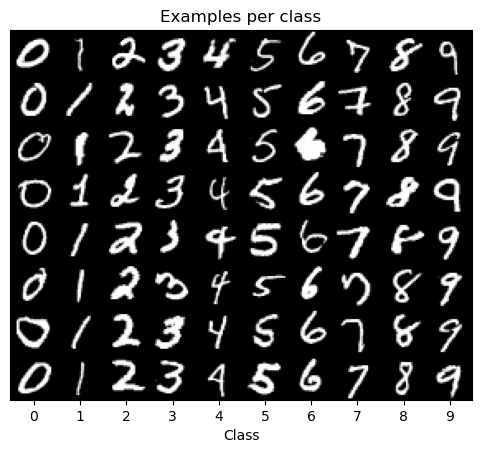

In [7]:
# plot_examples(train_set)

https://discuss.pytorch.org/t/parallelize-architecture-for-predictive-coding-architecture/138581

In [5]:
import sys
import data_handling as dat

In [8]:
train_set, valid_set, test_set = dat.download_mnist()

Number of examples retained:
  24001 (training)
  5999 (validation)
  5000 (test)


<Axes: title={'center': 'Examples per class'}, xlabel='Class'>

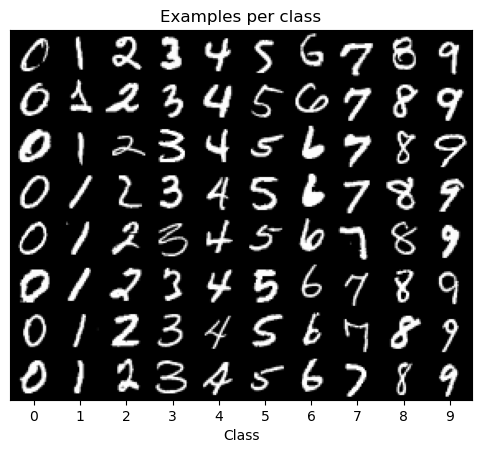

In [9]:
dat.plot_examples(train_set)